In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn plotly


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

from google.colab import files
import io


In [3]:
print("📂 Please upload your dataset (.csv)...")
uploaded = files.upload()

for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"\n✅ Loaded dataset: {filename}")
    print("Shape:", df.shape)
    display(df.head())


📂 Please upload your dataset (.csv)...


Saving AirQualityData.csv to AirQualityData.csv

✅ Loaded dataset: AirQualityData.csv
Shape: (4000, 23)


,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
0,2024-01-01,00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,...,209.984267,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0
1,2024-01-01,01:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,...,319.534890,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1
2,2024-01-01,02:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,...,274.644300,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2
3,2024-01-01,03:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,...,312.266023,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3
4,2024-01-01,04:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,...,21.392120,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4


In [5]:
print("\n🔍 Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())



🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 4000 non-null   object 
 1   Time                 4000 non-null   object 
 2   CO(GT)               4000 non-null   float64
 3   NOx(GT)              4000 non-null   float64
 4   NO2(GT)              4000 non-null   float64
 5   O3(GT)               4000 non-null   float64
 6   SO2(GT)              4000 non-null   float64
 7   PM2.5                4000 non-null   float64
 8   PM10                 4000 non-null   float64
 9   Temperature          4000 non-null   float64
 10  Humidity             4000 non-null   float64
 11  Pressure             4000 non-null   float64
 12  WindSpeed            4000 non-null   float64
 13  WindDirection        4000 non-null   float64
 14  CO_NOx_Ratio         4000 non-null   float64
 15  NOx_NO2_Ratio        

In [6]:
# Drop duplicates
df = df.drop_duplicates()

# Fill missing values with column mean
df = df.fillna(df.mean(numeric_only=True))

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

print("\n✅ Data Preprocessing Done. Shape:", scaled_data.shape)



✅ Data Preprocessing Done. Shape: (4000, 21)


In [7]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

print("\nExplained variance ratio:", pca.explained_variance_ratio_)



Explained variance ratio: [0.09176823 0.09018786]


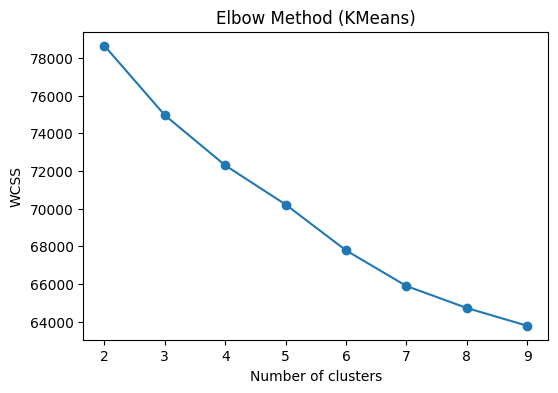

In [8]:
wcss = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method (KMeans)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Example: Choose k=3 (based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
k_clusters = kmeans.fit_predict(scaled_data)
df['KMeans_Cluster'] = k_clusters


In [9]:
agg = AgglomerativeClustering(n_clusters=3)
h_clusters = agg.fit_predict(scaled_data)
df['Hier_Cluster'] = h_clusters


In [10]:
dbscan = DBSCAN(eps=2, min_samples=5)
db_clusters = dbscan.fit_predict(scaled_data)
df['DBSCAN_Cluster'] = db_clusters


In [11]:
print("\n📊 Cluster Evaluation Scores:")

# KMeans evaluation
print("KMeans Silhouette Score:", silhouette_score(scaled_data, k_clusters))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(scaled_data, k_clusters))

# Hierarchical evaluation
print("Hierarchical Silhouette Score:", silhouette_score(scaled_data, h_clusters))
print("Hierarchical Davies-Bouldin Index:", davies_bouldin_score(scaled_data, h_clusters))



📊 Cluster Evaluation Scores:
KMeans Silhouette Score: 0.058650222121494115
KMeans Davies-Bouldin Index: 3.4123119360728746
Hierarchical Silhouette Score: 0.05169718951890009
Hierarchical Davies-Bouldin Index: 3.0525641590324173


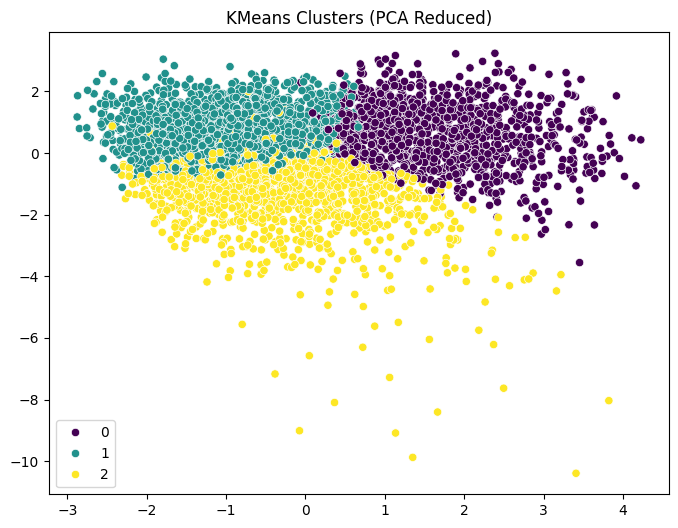

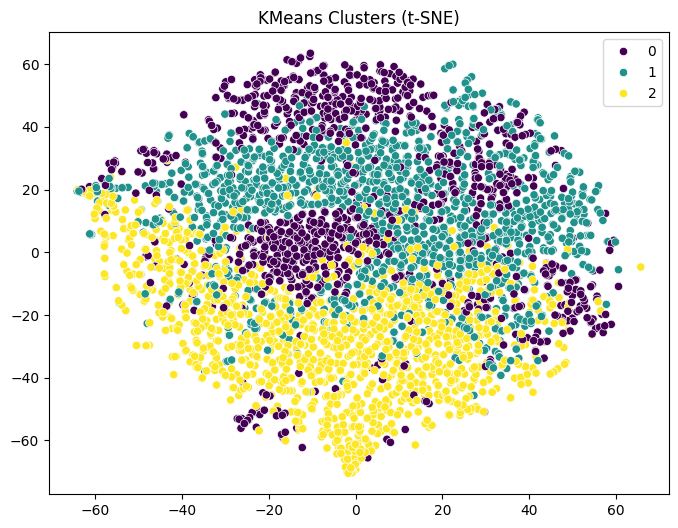

In [12]:
# PCA Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=k_clusters, palette="viridis")
plt.title("KMeans Clusters (PCA Reduced)")
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=k_clusters, palette="viridis")
plt.title("KMeans Clusters (t-SNE)")
plt.show()

# Plotly interactive PCA
fig = px.scatter(x=pca_data[:,0], y=pca_data[:,1], color=df['KMeans_Cluster'].astype(str),
                 title="Interactive PCA Cluster Visualization")
fig.show()


In [14]:
print("\n📌 Cluster Summary (KMeans):")
# Select only numeric columns before calculating the mean
display(df.groupby('KMeans_Cluster').mean(numeric_only=True))


📌 Cluster Summary (KMeans):


,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,Humidity,Pressure,...,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour,Hier_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.837384,143.545888,108.762783,88.918040,26.514428,101.839037,157.599659,29.296545,73.671083,1001.064737,...,1.991209,21.098942,243.877069,4.868232,104.467719,89.403880,2.998219,11.475512,0.668744,-1.0
1,4.891929,154.460127,143.250443,89.923817,26.383551,107.954063,154.552612,11.213664,46.345375,999.666176,...,1.175333,4.107586,255.357098,4.976410,121.750337,88.841739,2.990560,11.732974,0.058665,-1.0
2,5.318815,145.079004,47.540706,90.708237,25.410094,103.732339,149.339834,14.125558,48.093485,999.103355,...,6.936554,5.659704,248.092750,5.205412,73.900783,91.430376,2.948350,11.225968,0.167862,-1.0
